In [2]:
import matplotlib.pyplot as plt
from math import log2
import statistics as stat

In [6]:
blockNum=1
with open(f'output{blockNum}.txt', 'r') as f:
    content = f.read()
data = eval(content)

def stdVariance(array):
    mean = sum(array) / len(array)
    var = sum([(a - mean)**2 for a in array]) / len(array)
    return var**0.5

avg = [stat.mean(a[1]) for a in data]
var = [stdVariance(a[1]) for a in data]
y1 = [avg[i] + 1*var[i] for i in range(len(avg))]
y2 = [avg[i] - 1*var[i] for i in range(len(avg))]
print(avg)
print(var)

[0.3687757818280138, 0.17675287795765962, 0.08761997792228715, 0.042165099286288706, 0.02660122537448127, 0.01201494016335633, 0.00569451023450702, 0.0027354512503933925, 0.0013925571438643703]
[0.10005491980309993, 0.049228926408941796, 0.022844419998528757, 0.012947076933237621, 0.006956760986134326, 0.0027449854408277347, 0.001703602110621783, 0.000957108686195683, 0.00039872635062107673]


[0.3687757818280138, 0.17675287795765962, 0.08761997792228715, 0.042165099286288706, 0.02660122537448127, 0.01201494016335633, 0.00569451023450702, 0.0027354512503933925, 0.0013925571438643703]


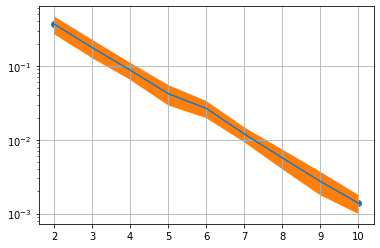

In [8]:
x = [log2(a[0]) for a in data]
y = avg
print(y)
plt.plot(x,y)
plt.yscale("log")
plt.scatter(x,y)
plt.fill_between(x, y1, y2)
plt.grid()
plt.show()
